In [1]:
#automatically reload stuff
%reload_ext autoreload
%autoreload 2
from SymptomPreprocessing import *
from SpatialPreprocessing import *
import Cluster
import Metrics
import re
from warnings import simplefilter 
from sklearn.mixture import GaussianMixture, BayesianGaussianMixture
from sklearn.decomposition import PCA
simplefilter(action='ignore')
pd.set_option('display.max_rows', 1000)

In [2]:
rds = RadDataset()
rds.get_value_array(rds.dvh_df.columns,keep_2d=False)

spellchecking...
renaming things
filtering pateints
adding nan values for missing organs
adding histograms


array([[[3.71562500e+01, 5.98750000e+01, 9.15625000e+01, ...,
         2.97000000e+02, 4.44375000e+01, 1.21191406e+00],
        [2.38906250e+01, 0.00000000e+00, 1.00000000e+02, ...,
         1.76800000e+03, 2.54531250e+01, 0.00000000e+00],
        [4.33750000e+01, 6.54375000e+01, 8.00000000e+01, ...,
         3.41000000e+02, 5.13750000e+01, 1.37343750e+01],
        ...,
        [1.75156250e+01, 2.42968750e+00, 1.00000000e+02, ...,
         1.25900000e+03, 2.18750000e+01, 0.00000000e+00],
        [9.64062500e+00, 0.00000000e+00, 4.62812500e+01, ...,
         1.00000000e+00, 1.27500000e+01, 0.00000000e+00],
        [2.24375000e+01, 1.75156250e+01, 1.00000000e+02, ...,
         1.55900000e+03, 3.09062500e+01, 0.00000000e+00]],

       [[3.79687500e+01, 6.21250000e+01, 7.83750000e+01, ...,
         1.84000000e+02, 4.14375000e+01, 0.00000000e+00],
        [2.33750000e+01, 0.00000000e+00, 1.00000000e+02, ...,
         1.36900000e+03, 2.50312500e+01, 0.00000000e+00],
        [4.66250000e+01, 

In [3]:
def rolled_up_dvh_valdf(rds,cols=None):
    #returns a dvh df with organ values rolled up nicely
    #note, currently uses string sort so idk how to make the order nice right now
    if cols == None:
        cols = rds.dvh_df.columns
    cols = sorted((set(cols) - set(['ROI','Structure','id'])).intersection(set(rds.dvh_df.columns)))
    vdf = rds.get_value_array(cols,as_df=True)
    olist = rds.organ_list
    print(len(olist))
    vallist=[]
    for col in list(cols):
        #organ values in order
        colnames = [o + '_' + col for o in olist]
        valdf = vdf[colnames].sort_index()
        vals = valdf.values.tolist()
        vallist.append(vals)
    valdf = pd.DataFrame(np.swapaxes(np.array(vallist),0,1).tolist(),index=vdf.index,columns=cols)
    return valdf

rolled_up_dvh_valdf(rds,cols=['D10','mean_dose'])

40


,D10,mean_dose
id,,
2.0,"[51.625, 26.890625, 56.1875, 53.625, 53.75, 57...","[35.72055395268319, 23.816881203970524, 36.247..."
6.0,"[44.96875, 26.40625, 61.71875, 56.78125, 55.18...","[30.499019492025983, 22.78990464240902, 32.607..."
7.0,"[37.625, 37.15625, 60.3125, 66.3125, 49.4375, ...","[22.765716284275324, 33.629034598214275, 56.96..."
8.0,"[32.15625, 32.0625, 56.6875, 65.375, 22.5, 31....","[19.083991985203443, 21.81411015361559, 48.068..."
9.0,"[51.4375, 27.515625, 51.4375, 51.4375, 18.6875...","[33.666961689755446, 20.803234820775426, 33.66..."
10.0,"[44.21875, 35.625, 64.75, 55.9375, 52.84375, 5...","[27.220497237569013, 29.323211818879553, 40.88..."
11.0,"[26.15625, 31.984375, 45.40625, 57.125, 29.265...","[13.436689655172408, 21.328410064239833, 43.44..."
12.0,"[3.279296875, 34.4375, 1.7197265625, 49.25, 7....","[1.5849153730595893, 16.176389838788452, 1.189..."
13.0,"[42.21875, 29.625, 60.46875, 48.6875, 19.5, 41...","[31.537254246355477, 21.261616120771006, 46.58..."


In [4]:
def merge_dose_symptom_dfs(imputed_symptom_df,rds,dvh_cols=None,roll_up=True):
    n_id = lambda d: len(d.reset_index().id.unique())
    if roll_up:
        dose_df= rolled_up_dvh_valdf(rds,cols=dvh_cols)
    else:
        dose_df = rds.get_value_array(rds.dvh_df.columns,keep_2d=True,as_df=True)
    n_dose = n_id(dose_df)
    n_imputed = n_id(imputed_symptom_df)
    dose_df.index = dose_df.index.astype('int')
    merged = dose_df.merge(imputed_symptom_df.set_index('id'),on='id',how='inner')
    n_merged = n_id(merged)
    print('dose ids:',n_dose,'syptom ids:',n_imputed,'merged ids:',n_merged)
    return merged

def get_merged_symp_dose_df(**kwargs):
    rds = RadDataset()
    df = load_mdasi()
    imputed_df = impute_and_group(df,use_domains=False)
    merged = merge_dose_symptom_dfs(imputed_df,rds,**kwargs)
    return merged

sd_df = get_merged_symp_dose_df(roll_up=True)
sd_df.T

spellchecking...
renaming things
filtering pateints
adding nan values for missing organs
adding histograms
before drop count 823
after drop count 535
error (%) 0.7424412531907885
[('severe_6wk_symptoms', 0.009345794392523364), ('severe_late_symptoms', 0.014953271028037384), ('moderate_6wk_symptoms', 0.052336448598130844), ('moderate_late_symptoms', 0.04672897196261682), ('mild_6wk_symptoms', 0.19626168224299065), ('mild_late_symptoms', 0.17009345794392525)]
40
dose ids: 484 syptom ids: 535 merged ids: 349


id,7,8,9,10,11,13,15,16,18,22,...,792,794,797,800,803,807,809,811,813,816
D10,"[37.625, 37.15625, 60.3125, 66.3125, 49.4375, ...","[32.15625, 32.0625, 56.6875, 65.375, 22.5, 31....","[51.4375, 27.515625, 51.4375, 51.4375, 18.6875...","[44.21875, 35.625, 64.75, 55.9375, 52.84375, 5...","[26.15625, 31.984375, 45.40625, 57.125, 29.265...","[42.21875, 29.625, 60.46875, 48.6875, 19.5, 41...","[44.90625, 33.28125, 47.75, 57.71875, 43.625, ...","[24.9375, 32.28125, 52.625, 56.84375, 39.09375...","[51.4375, 29.78125, 51.4375, 51.4375, 30.5625,...","[45.4375, 35.125, 71.375, 64.8125, 62.78125, 6...",...,"[15.09375, 16.125, 15.6015625, 44.5625, 20.578...","[30.34375, 26.515625, 47.53125, 52.15625, 40.8...","[28.28125, 30.0625, 58.3125, 56.84375, 55.6875...","[13.7421875, 18.546875, 28.5625, 34.875, 21.56...","[51.4375, 10.3125, 2.6796875, 14.53125, 1.8603...","[35.0625, 38.71875, 57.15625, 55.03125, 38.5, ...","[1.580078125, 6.76171875, 2.419921875, 17.4375...","[51.4375, 24.453125, 51.4375, 51.4375, 26.0312...","[51.4375, 0.0200042724609375, 51.4375, 51.4375...","[7.55859375, 10.3125, 24.59375, 17.15625, 20.6..."
D15,"[36.5625, 36.75, 59.96875, 64.0625, 48.375, 49...","[31.703125, 31.109375, 55.75, 63.34375, 21.312...","[48.59375, 26.671875, 48.59375, 48.59375, 15.0...","[43.1875, 34.28125, 62.6875, 54.3125, 50.78125...","[25.625, 31.359375, 45.15625, 56.875, 26.48437...","[41.8125, 29.046875, 58.34375, 48.15625, 14.52...","[44.0, 32.75, 47.5625, 57.21875, 40.40625, 48....","[24.0, 31.453125, 51.9375, 56.125, 34.15625, 4...","[48.59375, 28.984375, 48.59375, 48.59375, 29.2...","[44.34375, 34.03125, 70.8125, 63.78125, 59.312...",...,"[13.5625, 15.4765625, 14.390625, 43.25, 20.234...","[29.703125, 26.078125, 45.4375, 49.625, 39.937...","[26.75, 29.4375, 54.875, 53.96875, 54.34375, 4...","[13.1875, 17.765625, 27.0625, 34.34375, 21.218...","[48.59375, 10.046875, 1.9296875, 14.1875, 1.75...","[34.53125, 38.28125, 55.5, 54.46875, 37.0625, ...","[1.1796875, 6.51171875, 2.23046875, 16.65625, ...","[48.59375, 23.265625, 48.59375, 48.59375, 23.6...","[48.59375, 0.0200042724609375, 48.59375, 48.59...","[5.51171875, 9.8203125, 22.015625, 13.7578125,..."
D2,"[39.96875, 38.0625, 60.90625, 71.8125, 52.1562...","[33.4375, 34.09375, 58.28125, 68.75, 33.6875, ...","[56.65625, 29.5625, 56.65625, 56.65625, 27.312...","[47.84375, 39.21875, 68.5625, 58.15625, 57.406...","[27.5625, 33.25, 45.84375, 57.65625, 36.75, 44...","[43.0, 31.0, 70.625, 54.09375, 35.5625, 51.0, ...","[46.5, 34.9375, 48.375, 58.71875, 46.875, 51.9...","[28.5, 34.84375, 53.65625, 58.4375, 48.3125, 5...","[56.65625, 31.953125, 56.65625, 56.65625, 34.5...","[48.875, 38.09375, 72.25, 69.25, 67.625, 66.62...",...,"[17.375, 19.390625, 16.84375, 46.1875, 21.2187...","[32.09375, 27.90625, 52.53125, 55.53125, 43.96...","[34.3125, 31.390625, 64.25, 64.0625, 59.09375,...","[14.4921875, 20.734375, 30.59375, 36.125, 23.5...","[56.65625, 11.0078125, 4.33984375, 16.4375, 2....","[38.125, 39.65625, 58.28125, 56.21875, 43.4062...","[2.6796875, 7.2890625, 3.48046875, 18.40625, 5...","[56.65625, 27.078125, 56.65625, 56.65625, 33.5...","[56.65625, 0.0200042724609375, 56.65625, 56.65...","[12.3203125, 11.328125, 33.75, 28.546875, 25.0..."
D20,"[35.25, 36.34375, 59.71875, 62.71875, 47.34375...","[31.203125, 30.25, 54.5625, 61.34375, 17.84375...","[46.03125, 25.9375, 46.03125, 46.03125, 13.0, ...","[42.0, 33.125, 59.53125, 52.84375, 48.875, 46....","[25.09375, 30.71875, 45.0, 56.65625, 22.828125...","[41.40625, 28.46875, 56.4375, 47.8125, 12.9921...","[43.0625, 32.28125, 47.375, 56.625, 37.15625, ...","[22.6875, 30.375, 51.375, 55.5, 30.84375, 43.6...","[46.03125, 28.3125, 46.03125, 46.03125, 28.265...","[43.5, 33.25, 68.6875, 62.8125, 56.28125, 60.9...",...,"[12.5703125, 15.0, 12.2734375, 41.96875, 19.95...","[29.015625, 25.71875, 44.09375, 48.03125, 39.1...","[25.609375, 28.78125, 52.40625, 51.9375, 53.21...","[12.4921875, 17.0625, 25.65625, 34.0, 20.85937...","[46.03125, 9.71875, 1.580078125, 13.84375, 1.6

In [5]:
def add_sd_dose_clusters(sddf, 
                         clusterer = None,
                         features=None,
                         reducer=None,
                         normalize = True,
                        ):
    if clusterer is None:
        clusterer = BayesianGaussianMixture(n_init=4,
                                            n_components=6, 
                                            covariance_type="full",
                                            random_state=100)
    if features is None:
        features=['mean_dose','V65','V45','V35','V25','V15']
    if reducer is None:
        reducer= PCA(len(Const.organ_list),whiten=True)
    vals = np.stack(sddf[features].apply(lambda x: np.stack([np.array(i) for i in x]).ravel(),axis=1).values)
    if normalize:
        vals = (vals - vals.mean(axis=0))/(vals.std(axis=0) + .01)
    if reducer is not None:
        vals = reducer.fit_transform(vals)
    df = pd.DataFrame(vals,index = sddf.index)
    clusters = clusterer.fit_predict(vals)
    new_df = sddf.copy()
    new_df['dose_clusters'] = clusters
    return new_df

def df_to_symptom_array(df,use_groups = True, use_domains = False, simplify = False):
    df = df.copy()
    #determines if we use 3 the
    symptom_cols = df_symptom_names(df,use_groups=use_groups,use_domains=use_domains)
    def stack_row(row):
        vals = np.stack(row.values)
        return vals
    vals = np.stack(df[symptom_cols].apply(stack_row,axis=1).values)
    return vals

def add_sd_symptom_clusters(sddf,
                            use_groups = True,
                            use_domains=False,
                            sim_func = None, 
                            n = 5, 
                            link='ward',
                            n_timesteps=9,
                            simplify=True,
                           ):
    array = df_to_symptom_array(sddf,
                                use_groups = use_groups,
                                use_domains=use_domains, 
                                simplify = simplify)
    end = min(n_timesteps, array.shape[-1])
    x = array[:,:,0:end]
    if sim_func is None:
        print('using default similarity')
        sim_func = Metrics.DTWd2d()
    
    clusterer = Cluster.SimilarityClusterer(n,link=link)
    sim = sim_func.get_similarity_matrix(x)
    clusters = clusterer.fit_predict(sim)
    
    #reorder clusters so larger == higher average rating
    cluster_severities = {}
    clusts = np.unique(clusters)
    for c in clusts:
        subset = x[np.argwhere(clusters  == c).ravel()]
        #metric is take highest rating per patient and then average over the cluster
        avg_severity = subset.max(axis=1).max(axis=1).mean()
        cluster_severities[c] = avg_severity
    clust_order = np.argsort(sorted(cluster_severities.keys(), key = lambda x: cluster_severities[x]))
    clust_map = {c: clust_order[i] for i,c in enumerate(clusts)}
    ordered_clusts = np.array([clust_map.get(x) for x in clusters]).astype(int)
    
    new_df = sddf.copy()
    new_df['symptom_clusters'] = ordered_clusts
    return new_df

def add_sd_clusters(sddf):
    df = add_sd_symptom_clusters(sd_df)
    df = add_sd_dose_clusters(df)
    return df

sd_df = add_sd_clusters(sd_df)
sd_df.to_pickle(Const.data_dir + 'clustered_dose_symptoms_merged_csv.pickle')
sd_df

using default similarity


,D10,D15,D2,D20,D25,D30,D35,D40,D45,D5,...,symptomgroup_interference,symptomgroup_hnc,severe_6wk_symptoms,severe_late_symptoms,moderate_6wk_symptoms,moderate_late_symptoms,mild_6wk_symptoms,mild_late_symptoms,symptom_clusters,dose_clusters
id,,,,,,,,,,,,,,,,,,,,,
7,"[37.625, 37.15625, 60.3125, 66.3125, 49.4375, ...","[36.5625, 36.75, 59.96875, 64.0625, 48.375, 49...","[39.96875, 38.0625, 60.90625, 71.8125, 52.1562...","[35.25, 36.34375, 59.71875, 62.71875, 47.34375...","[34.0625, 35.90625, 59.40625, 61.53125, 46.562...","[33.125, 35.5, 59.1875, 60.34375, 45.6875, 43....","[32.28125, 35.03125, 58.90625, 59.03125, 44.75...","[31.609375, 34.625, 58.625, 57.71875, 43.96875...","[30.84375, 34.1875, 58.3125, 56.40625, 43.1875...","[38.6875, 37.625, 60.625, 71.0625, 50.75, 53.8...",...,"[0.0, 0.6666666666666666, 0.8333333333333334, ...","[0.7777777777777778, 0.7777777777777778, 0.777...",False,False,False,False,False,False,2,4
8,"[32.15625, 32.0625, 56.6875, 65.375, 22.5, 31....","[31.703125, 31.109375, 55.75, 63.34375, 21.312...","[33.4375, 34.09375, 58.28125, 68.75, 33.6875, ...","[31.203125, 30.25, 54.5625, 61.34375, 17.84375...","[30.609375, 29.40625, 52.375, 60.03125, 14.367...","[29.9375, 28.390625, 50.5625, 59.5, 13.140625,...","[28.96875, 27.453125, 49.46875, 58.96875, 11.7...","[27.1875, 26.46875, 48.59375, 58.53125, 11.203...","[24.875, 25.453125, 48.0, 58.125, 10.9609375, ...","[32.78125, 33.125, 57.65625, 67.375, 25.3125, ...",...,"[0.5, 1.1666666666666667, 1.3333333333333333, ...","[0.5555555555555556, 1.6666666666666667, 0.666...",False,False,False,False,False,False,2,2
9,"[51.4375, 27.515625, 51.4375, 51.4375, 18.6875...","[48.59375, 26.671875, 48.59375, 48.59375, 15.0...","[56.65625, 29.5625, 56.65625, 56.65625, 27.312...","[46.03125, 25.9375, 46.03125, 46.03125, 13.0, ...","[43.53125, 25.296875, 43.53125, 43.53125, 11.3...","[41.28125, 24.671875, 41.28125, 41.28125, 10.3...","[39.15625, 24.046875, 39.15625, 39.15625, 9.82...","[37.0, 23.359375, 37.0, 37.0, 9.4609375, 11.28...","[35.125, 22.625, 35.125, 35.125, 9.109375, 9.3...","[54.46875, 28.625, 54.46875, 54.46875, 23.3125...",...,"[0.0, 0.16666666666666666, 0.16666666666666666...","[0.0, 1.0, 1.0, 1.7777777777777777, 2.0, 2.0, ...",False,False,False,False,False,False,1,5
10,"[44.21875, 35.625, 64.75, 55.9375, 52.84375, 5...","[43.1875, 34.28125, 62.6875, 54.3125, 50.78125...","[47.84375, 39.21875, 68.5625, 58.15625, 57.406...","[42.0, 33.125, 59.53125, 52.84375, 48.875, 46....","[40.71875, 32.34375, 58.65625, 51.4375, 47.343...","[38.90625, 31.625, 58.3125, 50.0, 46.5, 44.687...","[36.875, 30.921875, 57.8125, 48.75, 46.125, 43...","[35.5625, 30.1875, 56.6875, 47.6875, 45.75, 43...","[33.96875, 29.4375, 55.03125, 46.4375, 45.3125...","[45.71875, 37.34375, 66.6875, 57.46875, 55.25,...",...,"[0.16666666666666666, 0.6666666666666666, 1.0,...","[0.3333333333333333, 0.6666666666666666, 0.333...",False,False,False,False,False,False,4,1
11,"[26.15625, 31.984375, 45.40625, 57.125, 29.265...","[25.625, 31.359375, 45.15625, 56.875, 26.48437...","[27.5625, 33.25, 45.84375, 57.65625, 36.75, 44...","[25.09375, 30.71875, 45.0, 56.65625, 22.828125...","[22.625, 30.15625, 44.8125, 56.46875, 19.85937...","[19.75, 29.65625, 44.625, 56.21875, 17.640625,...","[14.1484375, 29.234375, 44.46875, 55.9375, 15....","[11.09375, 28.84375, 44.21875, 55.6875, 14.210...","[9.1015625, 28.46875, 44.03125, 55.4375, 12.53...","[26.8125, 32.71875, 45.625, 57.40625, 33.03125...",...,"[0.0, 0.0, 0.0, 1.3333333333333333, 0.0, 0.0, ...","[0.0, 0.0, 0.2222222222222222, 1.7777777777777...",False,False,False,False,False,False,1,2
13,"[42.21875, 29.625, 60.46875, 48.6875, 19.5, 41...","[41.8125, 29.046875, 58.34375, 48.15625, 14.52...","[43.0, 31.0, 70.625, 54.09375, 35.5625, 51.0, ...","[41.40625, 28.46875, 56.4375, 47.8125, 12.9921...","[41.03125, 27.859375, 54.5, 47.59375, 10.29687...","[40.65625, 27.234375, 52.78125, 47.375, 9.3593...","[40.3125, 26.359375, 50.9375, 47.1875, 8.67187...","[39.90625, 25.09

In [6]:
def unroll_sd_merged_df(sddf,cols = None, olist=None,drop_extra=False):
    #needs the right organ list, just in case I need that some time, should always be mapped to constants really
    if olist is None:
        olist = Const.organ_list
    new_cols = []
    if cols is None:
        cols = sddf.columns
    sddf = sddf.sort_index()
    ids = sddf.index
    new_df = []
    dates = None
    #I cant figure out how to exclude strings when unravleing because it converts them to objects
    exceptions = set(['t_stage','treatment','treatment2',
                      'typetreatment','n_stage','subsite',
                      'dates','chemotherapy'])
    if 'dates' in sddf.columns:
        dates = list(sddf.dates.iloc[0])
    for col in cols:
        is_list = Utils.iterable(sddf[col].values[0])
        subdf = sddf[col]
        if is_list and col not in exceptions:
            try:
                count = 0
                def get_label(col):
                    nonlocal count
                    string = col + '_' + str(count)
                    if get_dvhcol_pos(col) > -1 or 'dose' in col or 'volume' in col:
                        string = col + '_' + olist[count]
                    if 'symptom' in col and dates is not None:
                        string= col + '_t=' + str(count)#str(dates[count])
                    count = count + 1
                    return string
                vals = np.stack(subdf.values)
                colnames = [get_label(col) for x in np.arange(vals.shape[-1])]
                partial_df = pd.DataFrame(vals,index=ids,columns=colnames)
                new_df.append(partial_df)
            except:
                print('issue flattening thing',col)
                if not drop_extra:
                    partial_df = pd.DataFrame(subdf)
                    new_df.append(partial_df)
        else:
            if not drop_extra:
                partial_df = pd.DataFrame(subdf)
                new_df.append(partial_df)

    new_df = pd.concat(new_df,axis=1)
    print((len(np.unique(new_df.columns)) - len(new_df.columns))/(len(new_df.columns)))
    return new_df

def filter_flat_sddf(sddf,symptom_prefix='symptoms',
                     organ_cols=['mean_dose'],
                     organ_list = None,
                     global_cols =[],
                     threshold_symptoms=5,
                    ):
    acceptable = global_cols[:]
    if organ_list is None:
        organ_list = Const.organ_list[:]
    for option in organ_cols:
        candidates = [c for c in sddf.columns if option+'_' in c and c.replace(option+'_','').strip() in organ_list]
        acceptable.extend(candidates)
    symp_candidates =[]
    if symptom_prefix is not None:
        candidates = [c for c in sddf.columns if symptom_prefix + '_' in c and 'original' not in c]
        symp_candidates = candidates
        acceptable.extend(candidates)
    cols = sorted(set(acceptable))
    df = sddf[cols]
    if threshold_symptoms is not None:
        df[symp_candidates] = (df[symp_candidates] > threshold_symptoms).astype('int')
    return df
        
flat_sd_df = unroll_sd_merged_df(sd_df)
filter_flat_sddf(flat_sd_df,
#                  organ_list=['Brainstem'],
                 global_cols=['dose_clusters',
                              'symptom_clusters',
                              'severe_6wk_symptoms',
                              'severe_late_symptoms',
                              't_stage',
                             ],
                 symptom_prefix=None).T

0.0


id,7,8,9,10,11,13,15,16,18,22,...,792,794,797,800,803,807,809,811,813,816
dose_clusters,4,2,5,1,2,1,1,1,1,5,...,0,1,2,0,3,1,3,5,3,0
mean_dose_Brainstem,23.921419,9.299923,5.280681,13.058313,11.786641,11.456263,14.776745,6.652542,2.469384,11.531484,...,3.970349,7.938407,1.704466,6.567872,2.13929,10.035823,0.336808,4.160422,0.0,2.184951
mean_dose_Cricoid_cartilage,41.684462,14.681237,17.34511,43.060162,21.352529,19.675549,24.289012,29.057131,30.507944,53.469772,...,12.945766,31.035079,42.529724,15.179133,1.340548,26.95448,3.122496,22.63813,0.003287,9.893455
mean_dose_Cricopharyngeal_Muscle,43.193063,12.267907,10.542922,45.659953,14.876351,9.954105,18.465404,23.389591,25.06281,50.005113,...,17.458836,36.062358,45.630118,18.925739,1.382233,33.297312,3.943382,17.890557,0.004903,13.541513
mean_dose_Esophagus,22.765716,19.083992,33.666962,27.220497,13.43669,31.537254,35.636464,15.118502,33.666962,34.128847,...,7.02624,15.865434,17.70719,7.427874,33.666962,23.911041,0.528994,33.666962,33.666962,2.333588
mean_dose_Extended_Oral_Cavity,49.235487,61.332853,41.731694,64.438453,48.183785,49.322294,59.389247,52.76009,48.83889,61.291544,...,26.755351,49.595624,34.745252,20.175553,15.029685,45.904409,7.755295,42.680359,0.023802,21.544324
mean_dose_Genioglossus_M,56.791111,71.63639,47.797216,71.596566,53.148618,67.205887,67.077371,69.96319,62.127308,69.375956,...,33.533009,59.258139,60.252425,30.365046,10.02812,62.435883,14.350524,40.782692,0.004618,35.428151
mean_dose_Glottic_Area,29.097534,14.807006,14.20729,43.452101,13.97494,12.269219,20.805573,21.663493,30.499555,53.889937,...,8.625837,27.134765,37.846672,14.922975,2.631779,18.876629,2.693587,20.224286,0.487871,11.329906
mean_dose_Hard_Palate,28.373841,22.840983,30.29209,27.790915,30.636097,10.315169,28.675324,15.716911,0.0,36.473368,...,10.6024,25.693546,1.383666,6.265253,14.436183,16.380439,0.299075,26.286444,0.0,3.76826
mean_dose_Hyoid_bone,60.44851,72.036372,48.535511,71.717624,58.187765,71.890923,68.730943,72.436399,70.398875,71.95426,...,34.274781,62.371389,70.736473,29.795567,7.494469,70.419443,18.35672,35.167617,1.29244,41.179163


In [7]:
from pycausal.pycausal import pycausal as pc
from pycausal import prior as p
from pycausal import search
import pydot
from graphviz import Digraph
from IPython.display import SVG

pc = pc()
pc.start_vm()

In [72]:
# def run_fges(sddf,algoId='fges',filter_df=False,cols = [],symptom_prefix='symptomgroup'):
#     if filter_df:
#         df = filter_flat_sddf(sddf,symptom_prefix=symptom_prefix,other_cols=cols)
#     df = df.astype('int')
#     forbidden = []
#     #add restrictions
#     cols = df.columns
    
#     #symptoms can only affect the symptoms at the next timestep
#     def get_tstamp(string):
#         m = re.match('[a-zA-Z_]*t=(\d+)',string)
#         if m is not None:
#             return int(m.group(1))
#         return -1
#     for col in cols:
#         tstamp = get_tstamp(col)
#         #baseline symptoms are treated special
#         if tstamp > -1:
#             for col2 in cols:
#                 tstamp2 = get_tstamp(col2)
#                 if tstamp2 == -1 or tstamp2 - tstamp != 1:
#                     forbidden.append([col,col2])
#                 else:
#                     print([col,col2])
#     required = []
#     prior = p.knowledge(forbiddirect=forbidden,requiredirect=required)
#     tetrad = search.tetradrunner()
#     tetrad.run(algoId=algoId,
#               dfs=df,
#               testId=None,
#               priorKnowledge=prior)
#     return tetrad

def convert_values(df, 
                   categorical_cols = [],
                   ordinal_cols=[],
                   cat_threshold = 7,
                   drop_first=False,
                  ):
    #converts stuff to either one-hot or floats for processing
    #assumes anything with fewer discrete values than in cat_threshold
    #are categorical unless in ordinal)cols
    newdf = []
    def format_dummies(d,col):
        d = d.copy()
#         d[d[col].isnull()] = 'null'
        temp = pd.get_dummies(d[col],drop_first=drop_first)
        temp.columns = [str(col) + '_' + str(name) for name in temp.columns]
        return temp 
    
    for col in df.columns:
        is_cat  = col in categorical_cols or (len(df[col].unique()) < cat_threshold and col not in ordinal_cols)
        if not is_cat:
            try:
                temp = df[col].astype('float')
                temp[temp.isnull()] = 0
                newdf.append(temp)
            except:
                try:
                    newdf.append(format_dummies(df,col))
                except Exception as e:
                    print(col,e)
        else:
            newdf.append(format_dummies(df,col))
    return pd.concat(newdf,axis=1)

def run_structure_learning(sddf,algoId='fges',
                           forbid=None,
                           require=None,
                           drop_first=False,
                           fixed = ['age','is_male',],
                           col_subset=None,
                           global_cols=[],
                           **kwargs,
                          ):
    df = unroll_sd_merged_df(sd_df)
    df = filter_flat_sddf(df,global_cols=global_cols,**kwargs)
    if col_subset is not None:
        df = df[col_subset]
    df = df.replace('+','_')
    df = convert_values(df,
                        drop_first=drop_first,
                       )
    df = df.replace(' ','_').replace('+','_')
    df.columns = [c.replace(' ','_').replace('+','_') for c in df.columns]
    if forbid is None:
        forbid = []
    if require is None:
        require = []
    for col in df.columns:
        for f in fixed:
            if f in col:
                for col2 in df.columns:
                    if f not in col2:
                        forbid.append([col2,col])
                
    converted_cols = list(set(df.columns) - set(global_cols))
    for base_col in global_cols:
        for cc in converted_cols:
            if base_col in cc:
                for cc2 in converted_cols:
                    if base_col in cc2:
                        forbid.append([cc,cc2])
    prior = p.knowledge(forbiddirect=forbid,requiredirect=require)
    tetrad = search.tetradrunner()
    tetrad.run(algoId=algoId,
              dfs=df,
              testId=None,
              priorKnowledge=prior
              )
    return tetrad

organ_list = [
    'Esophagus',
    'Spinal_Cord',
    'Lt_Brachial_Plexus',
    'Rt_Brachial_Plexus',
    'Cricopharyngeal_Muscle',
    'Cricoid_cartilage',
    'IPC',
    'MPC',
    'Brainstem',
    'Larynx',
    'Thyroid_cartilage',
    'Rt_Sternocleidomastoid_M',
    'Rt_Mastoid',
    'Rt_Parotid_Gland',
    'Rt_Medial_Pterygoid_M',
    'Rt_Lateral_Pterygoid_M',
    'Rt_Masseter_M',
    'Lt_Sternocleidomastoid_M',
    'Lt_Mastoid',
    'Lt_Parotid_Gland',
    'Lt_Submandibular_Gland',
    'Lt_Medial_Pterygoid_M',
    'Lt_Lateral_Pterygoid_M',
    'Lt_Masseter_M',
    'Supraglottic_Larynx',
    'SPC',
    'Rt_Submandibular_Gland',
    'Hyoid_bone',
    'Soft_Palate',
    'Genioglossus_M',
    'Tongue',
    'Rt_Ant_Digastric_M',
    'Lt_Ant_Digastric_M',
    'Mylogeniohyoid_M',
    'Extended_Oral_Cavity',
    'Mandible',
    'Hard_Palate',
    'Lower_Lip',
    'Upper_Lip',
    'Glottic_Area',
             ]
tetrad = run_structure_learning(flat_sd_df,
                                organ_list=organ_list,
                                global_cols=[
                                 'dose_clusters',
                                 'symptom_clusters',
                                 'severe_6wk_symptoms',
                                 'severe_late_symptoms',
                                 'moderate_6wk_symptoms',
                                 'moderate_late_symptoms',
                                 't_stage',
                                'n_stage',
                                'age',
                                'is_male',
                                'subsite',
                                'concurrent',
                                'chemotherapy',
                                ],
                                drop_first=False,
                                symptom_prefix=None,
                                algoId='fges',
                               )
tetrad.getEdges()

0.0
Elapsed initializeForwardEdgesFromEmptyGraph = 260 ms
** FORWARD EQUIVALENCE SEARCH
1. INSERT mean_dose_Tongue --> mean_dose_Extended_Oral_Cavity [] 1011.9505267678533 
1. INSERT mean_dose_Tongue --> mean_dose_Extended_Oral_Cavity [] 1011.9505267678533  degree = 1 indegree = 1
2. INSERT mean_dose_Mandible --> mean_dose_Extended_Oral_Cavity [] 779.5190410024961 
2. INSERT mean_dose_Mandible --> mean_dose_Extended_Oral_Cavity [] 779.5190410024961  degree = 2 indegree = 1
3. INSERT mean_dose_Thyroid_cartilage --> mean_dose_Larynx [] 725.6105636935679 
3. INSERT mean_dose_Thyroid_cartilage --> mean_dose_Larynx [] 725.6105636935679  degree = 2 indegree = 1
4. INSERT mean_dose_Mylogeniohyoid_M --> mean_dose_Genioglossus_M [] 656.6323852511352 
4. INSERT mean_dose_Mylogeniohyoid_M --> mean_dose_Genioglossus_M [] 656.6323852511352  degree = 2 indegree = 1
5. INSERT mean_dose_Rt_Submandibular_Gland --> mean_dose_Rt_Sternocleidomastoid_M [] 615.3477938670289 
5. INSERT mean_dose_Rt_Submandib

54. INSERT mean_dose_MPC --> mean_dose_SPC [] 140.91776011476145 
54. INSERT mean_dose_MPC --> mean_dose_SPC [] 140.91776011476145  degree = 5 indegree = 2
55. INSERT mean_dose_Lt_Lateral_Pterygoid_M --> mean_dose_Hard_Palate [] 137.03480061899518 
55. INSERT mean_dose_Lt_Lateral_Pterygoid_M --> mean_dose_Hard_Palate [] 137.03480061899518  degree = 5 indegree = 2
56. INSERT mean_dose_Hard_Palate --> mean_dose_Brainstem [] 133.52698426408529 
56. INSERT mean_dose_Hard_Palate --> mean_dose_Brainstem [] 133.52698426408529  degree = 5 indegree = 2
57. INSERT mean_dose_Rt_Ant_Digastric_M --> mean_dose_Lt_Medial_Pterygoid_M [] 108.51367419229518 
57. INSERT mean_dose_Rt_Ant_Digastric_M --> mean_dose_Lt_Medial_Pterygoid_M [] 108.51367419229518  degree = 5 indegree = 2
58. INSERT mean_dose_Lower_Lip --> mean_dose_Upper_Lip [] 104.22674214088465 
58. INSERT mean_dose_Lower_Lip --> mean_dose_Upper_Lip [] 104.22674214088465  degree = 5 indegree = 2
59. INSERT mean_dose_SPC --> mean_dose_Larynx []

98. INSERT mean_dose_Spinal_Cord --> mean_dose_Rt_Sternocleidomastoid_M [] 41.27786313693855 
98. INSERT mean_dose_Spinal_Cord --> mean_dose_Rt_Sternocleidomastoid_M [] 41.27786313693855  degree = 8 indegree = 2
99. INSERT mean_dose_Hard_Palate --> dose_clusters_4 [] 39.594719356857354 
99. INSERT mean_dose_Hard_Palate --> dose_clusters_4 [] 39.594719356857354  degree = 8 indegree = 2
100. INSERT mean_dose_Cricoid_cartilage --> mean_dose_Supraglottic_Larynx [] 38.03583270798799 
100. INSERT mean_dose_Cricoid_cartilage --> mean_dose_Supraglottic_Larynx [] 38.03583270798799  degree = 8 indegree = 3
101. INSERT mean_dose_SPC --> dose_clusters_0 [] 35.49167149157802 
101. INSERT mean_dose_SPC --> dose_clusters_0 [] 35.49167149157802  degree = 8 indegree = 3
102. INSERT mean_dose_Lt_Mastoid --> mean_dose_Lt_Sternocleidomastoid_M [] 33.167028978982444 
102. INSERT mean_dose_Lt_Mastoid --> mean_dose_Lt_Sternocleidomastoid_M [] 33.167028978982444  degree = 8 indegree = 3
103. INSERT mean_dose_

143. INSERT mean_dose_Mylogeniohyoid_M --> mean_dose_SPC [] 14.023612681657596 
143. INSERT mean_dose_Mylogeniohyoid_M --> mean_dose_SPC [] 14.023612681657596  degree = 10 indegree = 3
144. INSERT subsite_BOT --> dose_clusters_1 [] 13.56644996225998 
144. INSERT subsite_BOT --> dose_clusters_1 [] 13.56644996225998  degree = 10 indegree = 3
145. INSERT dose_clusters_5 --> mean_dose_Lt_Sternocleidomastoid_M [] 12.549302066949394 
145. INSERT dose_clusters_5 --> mean_dose_Lt_Sternocleidomastoid_M [] 12.549302066949394  degree = 10 indegree = 3
146. INSERT mean_dose_Thyroid_cartilage --> mean_dose_Lt_Sternocleidomastoid_M [] 19.092335208254326 
146. INSERT mean_dose_Thyroid_cartilage --> mean_dose_Lt_Sternocleidomastoid_M [] 19.092335208254326  degree = 10 indegree = 3
147. INSERT n_stage_n2 --> chemotherapy_induction_concurrent [] 11.666377215610169 
147. INSERT n_stage_n2 --> chemotherapy_induction_concurrent [] 11.666377215610169  degree = 10 indegree = 3
148. INSERT mean_dose_Rt_Medial

193. INSERT mean_dose_Lt_Submandibular_Gland --> mean_dose_Glottic_Area [] 3.7141570173002947 
193. INSERT mean_dose_Lt_Submandibular_Gland --> mean_dose_Glottic_Area [] 3.7141570173002947  degree = 14 indegree = 4
194. INSERT subsite_BOT --> mean_dose_Hard_Palate [] 3.6274788307207473 
194. INSERT subsite_BOT --> mean_dose_Hard_Palate [] 3.6274788307207473  degree = 14 indegree = 4
195. INSERT mean_dose_Soft_Palate --> mean_dose_Genioglossus_M [] 3.4360501322082655 
195. INSERT mean_dose_Soft_Palate --> mean_dose_Genioglossus_M [] 3.4360501322082655  degree = 14 indegree = 4
196. INSERT mean_dose_Extended_Oral_Cavity --> mean_dose_Genioglossus_M [] 7.825475524923377 
196. INSERT mean_dose_Extended_Oral_Cavity --> mean_dose_Genioglossus_M [] 7.825475524923377  degree = 14 indegree = 4
197. INSERT mean_dose_Brainstem --> subsite_Pharyngeal_wall [] 3.3003172200085373 
197. INSERT mean_dose_Brainstem --> subsite_Pharyngeal_wall [] 3.3003172200085373  degree = 14 indegree = 4
198. INSERT m

** FORWARD EQUIVALENCE SEARCH
227. INSERT mean_dose_Rt_Parotid_Gland --> mean_dose_Lt_Mastoid [] 45.47391147292569 
227. INSERT mean_dose_Rt_Parotid_Gland --> mean_dose_Lt_Mastoid [] 45.47391147292569  degree = 15 indegree = 5
228. INSERT subsite_BOT --> mean_dose_Rt_Medial_Pterygoid_M [] 30.64753291034117 
228. INSERT subsite_BOT --> mean_dose_Rt_Medial_Pterygoid_M [] 30.64753291034117  degree = 15 indegree = 5
229. INSERT mean_dose_Rt_Masseter_M --> mean_dose_Lt_Medial_Pterygoid_M [] 14.949585804256003 
229. INSERT mean_dose_Rt_Masseter_M --> mean_dose_Lt_Medial_Pterygoid_M [] 14.949585804256003  degree = 15 indegree = 5
230. INSERT subsite_Tonsil --> mean_dose_Lt_Medial_Pterygoid_M [] 15.595013133230395 
230. INSERT subsite_Tonsil --> mean_dose_Lt_Medial_Pterygoid_M [] 15.595013133230395  degree = 15 indegree = 5
231. INSERT age --> mean_dose_Tongue [] 13.68983086151161 
231. INSERT age --> mean_dose_Tongue [] 13.68983086151161  degree = 15 indegree = 5
232. INSERT mean_dose_Rt_Mass

['mean_dose_Thyroid_cartilage --- age',
 'mean_dose_MPC --> mean_dose_Lower_Lip',
 'mean_dose_Extended_Oral_Cavity --> mean_dose_Tongue',
 'mean_dose_Thyroid_cartilage --> mean_dose_Larynx',
 'subsite_BOT --> mean_dose_Supraglottic_Larynx',
 'mean_dose_Soft_Palate --> dose_clusters_3',
 'mean_dose_Mylogeniohyoid_M --> mean_dose_Tongue',
 'dose_clusters_5 --> mean_dose_Soft_Palate',
 'mean_dose_Lt_Submandibular_Gland --> mean_dose_Rt_Ant_Digastric_M',
 'mean_dose_Tongue --> mean_dose_IPC',
 'mean_dose_Rt_Lateral_Pterygoid_M --> subsite_Tonsil',
 'mean_dose_Thyroid_cartilage --> mean_dose_Cricopharyngeal_Muscle',
 'mean_dose_Rt_Submandibular_Gland --> mean_dose_Rt_Medial_Pterygoid_M',
 'mean_dose_Extended_Oral_Cavity --> mean_dose_Rt_Parotid_Gland',
 'mean_dose_Mylogeniohyoid_M --> mean_dose_Lt_Lateral_Pterygoid_M',
 'subsite_BOT --> mean_dose_Rt_Medial_Pterygoid_M',
 'mean_dose_Lt_Medial_Pterygoid_M --> mean_dose_Lt_Mastoid',
 'chemotherapy_no_chemotherapy --> concurrent_0.0',
 'mean_do

cant decide on graph direction mean_dose_Thyroid_cartilage --- age


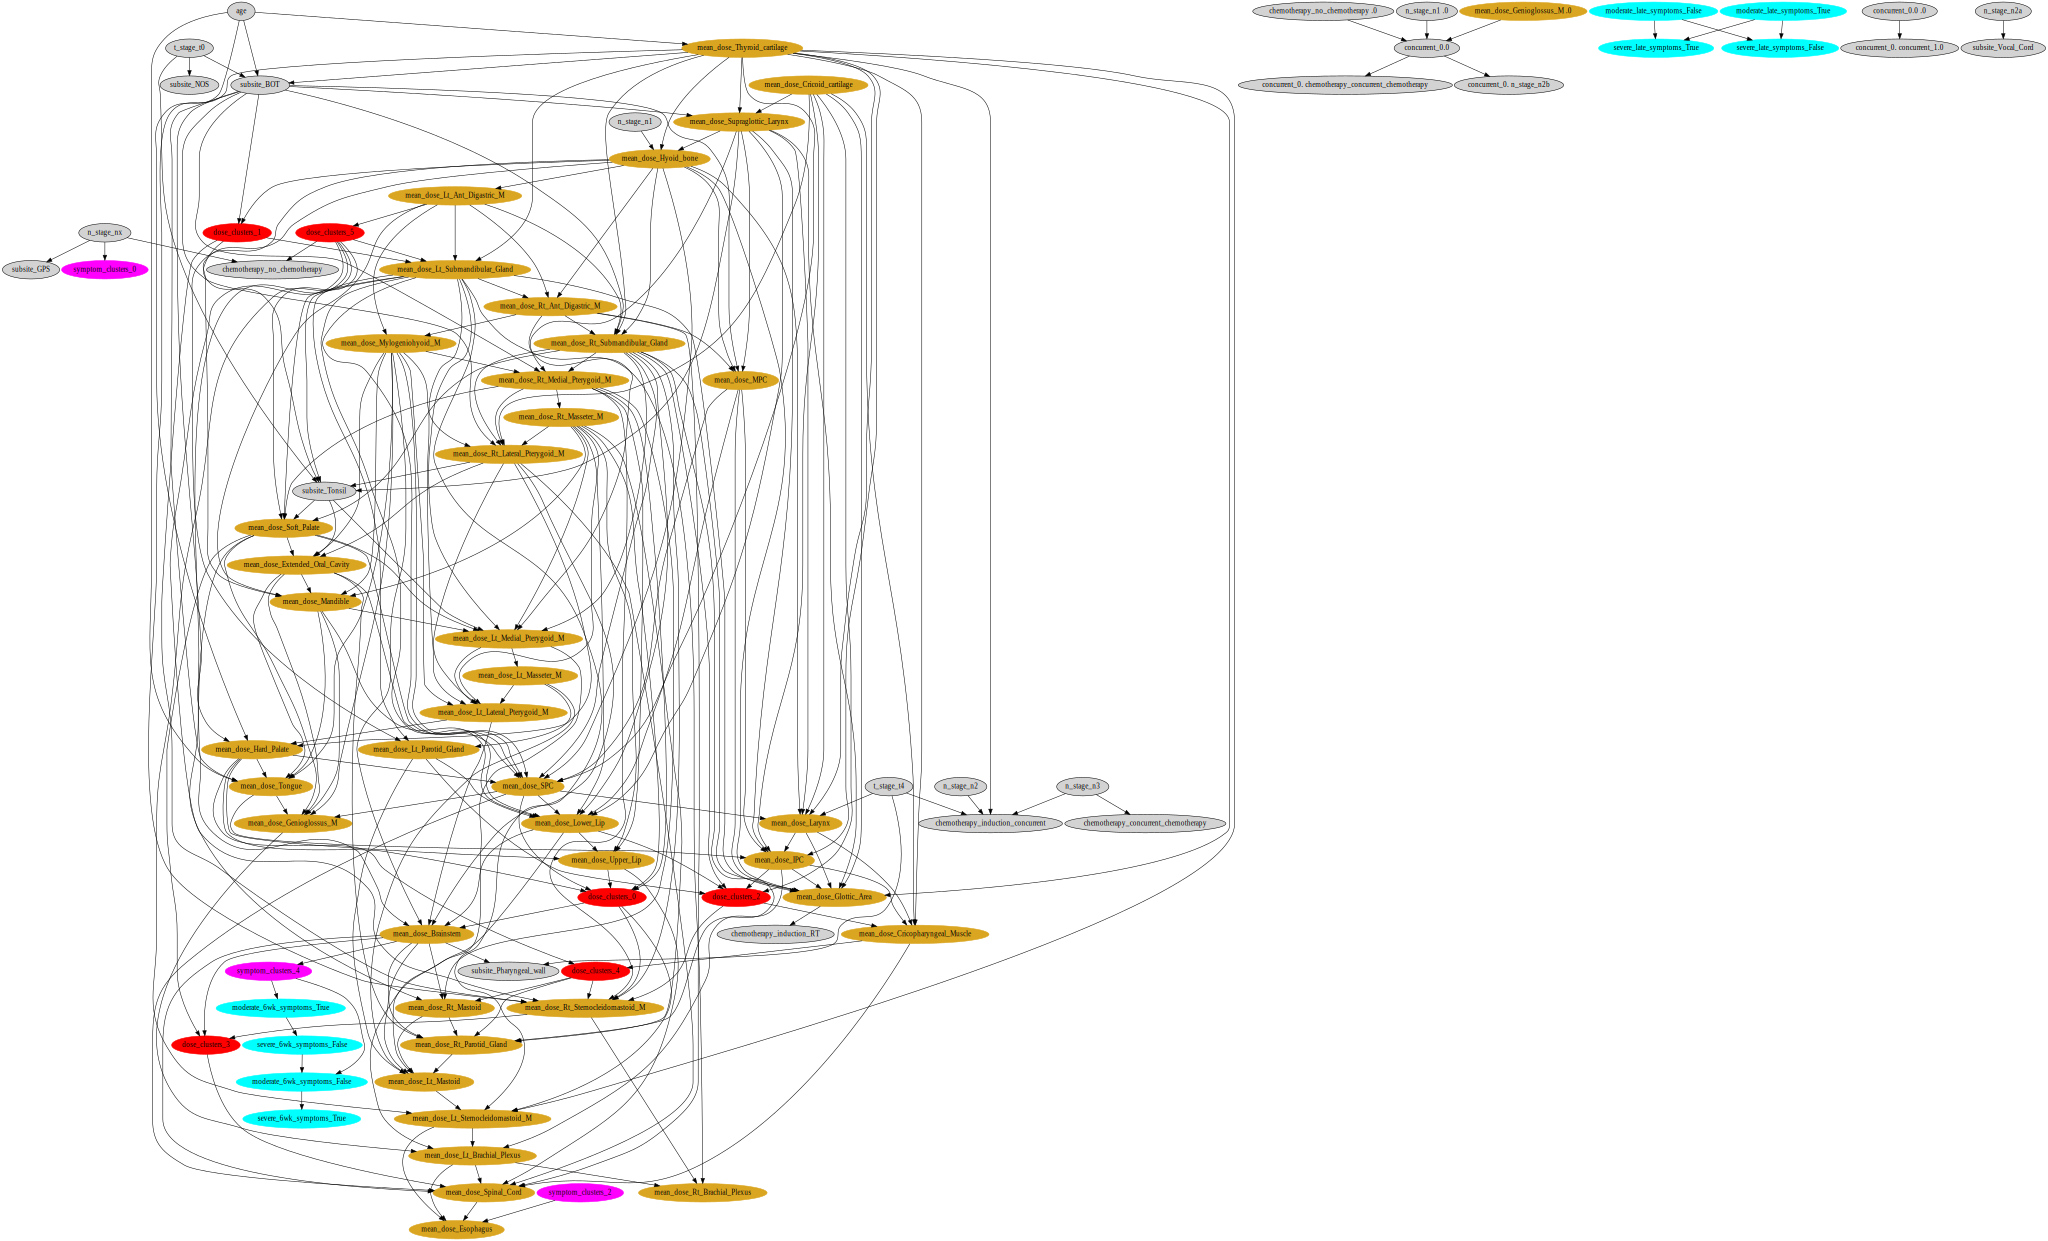

In [73]:
def get_symp_tstamp(string):
        m = re.match('[a-zA-Z_]*t=(\d+)',string)
        if m is not None:
            return int(m.group(1))
        return -1
    
def dir_edge(edge):
    target = re.sub('[a-zA-Z_\-\=0-9]*\s*-->','',edge).strip()
    source = re.sub('-->\s*[a-zA-Z_\-\=0-9]*','',edge).strip()
    return source,target

def undir_edge(edge,treatments,outcomes,fixed=[]):
    n1 = re.sub('[a-zA-Z_\-\=1-9]*\s+[o<\-]-[\-o>]\s+','',edge).strip()
    n2 = re.sub('\s+[o<\-]-[\-o>]\s+[a-zA-Z_\-\=1-9]*','',edge).strip()
    if '-->' in edge:
        return n1,n2
    
    if get_symp_tstamp(n1) < get_symp_tstamp(n2):
        return n1,n2
    if get_symp_tstamp(n2) < get_symp_tstamp(n1):
        return n2,n1
    if n1 in outcomes:
        return n2,n1
    if n2 in outcomes:
        return n1,n2
    if n1 in fixed:
        return n1, n2
    if n2 in fixed:
        return n2, n1
    if n1 in treatments:
        return n2, n1
    if n2 in treatments:
        return n1,n2
    #special case t category and other covariate
    if 'category' in n1:
        return n2,n1
    print('cant decide on graph direction',edge)
    return n1, n2

def get_edge_dict(graph,treatments=None,outcomes=None,fixed=None):
    edgedict = {}
    if treatments is None:
        treatments = []
    if outcomes is None:
        outcomes = []
    if fixed is None:
        fixed = []
    for edge in graph.getEdges():
        if '-->' in edge:
            source,target = dir_edge(edge)
        else:
            source,target = undir_edge(edge,treatments,outcomes,fixed)
        curredge = edgedict.get(target,[])
        curredge.append(source)
        edgedict[target] = curredge
    return edgedict

def print_graph(tetrad=None,
                edgedict=None,
                treatments=None,
                outcomes=None,
                fixed=None,
                confounders=None
               ):
    assert(tetrad is not None or edgedict is not None)
    if edgedict is None:
        edgedict = get_edge_dict(tetrad,
                                 treatments=treatments,
                                 outcomes=outcomes,
                                 fixed=fixed)
    gviz = Digraph('G',
                   filename='temp_slearning_graph',
                   format='png',
                   graph_attr = {'nodesep': '.05',
                                'overlap': 'compress',}
                  )

    def add_node(node,nodes):
        if node in nodes:
            return
        color = ''
        if 'mean_dose' in node:
            color = 'goldenrod'
        if 'symptom' in node:
            color = 'cyan'
        if 'cluster' in node:
            if 'symptom' in node:
                color = 'magenta'
            else:
                color = 'red'
        gviz.node(node,style='filled',color=color)
        nodes.add(node)
        
    nodes = set()
    for node,parents in edgedict.items():
        if node not in nodes:
            add_node(node,nodes)
        for parent in parents:
            add_node(parent,nodes)
            gviz.edge(parent,node)
    return gviz


graph = print_graph(tetrad)
graph.view()
graph

In [45]:
sd_df.dose_clusters.unique()

array([4, 2, 5, 1, 3, 0])

In [ ]:
# pc.stop_vm()